In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
fpath = 'dataset/abalone.data'

In [3]:
df = pd.read_csv(fpath, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(4177, 9)
            length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130

In [6]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

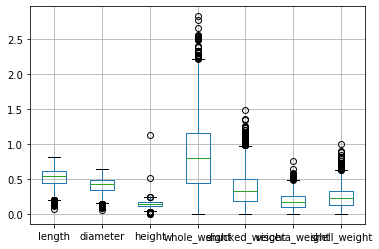

In [7]:
df.drop('rings', axis=1).boxplot()

In [8]:
target = 'rings'
features = list(df.columns)
features.remove(target)

In [9]:
# capping outliers
for f in features[1:]:
    upper_lim = df[f].quantile(0.75) + ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    lower_lim = df[f].quantile(0.25) - ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    
    df.loc[(df[f] > upper_lim), f] = upper_lim
    df.loc[(df[f] < lower_lim), f] = lower_lim

In [10]:
# sns.pairplot(df[features], hue='sex')

In [11]:
# sns.heatmap(df[features].corr(), annot=True)

In [12]:
y = df[target]
X = df[features]
X = pd.get_dummies(X)

In [13]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, test_size=0.1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.084307453282412


In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.820380374088831


In [17]:
from sklearn.svm import SVR

model = SVR()
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.139220231158612


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.0956486020872838


In [19]:
from sklearn.linear_model import Ridge

model = Ridge(random_state=1)
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.097858471240914


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(train_X, train_y)

pred = model.predict(test_X)

print(np.sqrt(mean_squared_error(test_y, pred)))

2.4175395772676613


/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(train_X)
X_test_transform = poly.fit_transform(test_X)
model.fit(X_train_transform, train_y)

pred = model.predict(X_test_transform)

print(np.sqrt(mean_squared_error(test_y, pred)))

1.9886015169424718


In [22]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1)
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(train_X)
X_test_transform = poly.fit_transform(test_X)
model.fit(X_train_transform, train_y)

pred = model.predict(X_test_transform)

print(np.sqrt(mean_squared_error(test_y, pred)))

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


2.0925731947698942


In [23]:
import keras.layers as layers
import keras

import tensorflow as tf

from numpy.random import seed
seed(1)

Using TensorFlow backend.


In [24]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    optimizer = keras.optimizers.Adam(0.0001)

    model.compile(loss='mse',
                optimizer=optimizer)
    return model

In [25]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)]

In [26]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 17,345
Trainable params: 17,345
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(
  train_X, train_y,
  epochs=500, validation_split = 0.2, verbose=1, callbacks=callbacks)

Train on 3007 samples, validate on 752 samples
Epoch 1/500
3007/3007 [==============================] - 1s 182us/step - loss: 103.3180 - val_loss: 88.3081
Epoch 2/500
3007/3007 [==============================] - 0s 41us/step - loss: 67.4937 - val_loss: 42.3095
Epoch 3/500
3007/3007 [==============================] - 0s 37us/step - loss: 27.1475 - val_loss: 19.6804
Epoch 4/500
3007/3007 [==============================] - 0s 38us/step - loss: 17.0704 - val_loss: 14.1488
Epoch 5/500
3007/3007 [==============================] - 0s 38us/step - loss: 12.4644 - val_loss: 10.3737
Epoch 6/500
3007/3007 [==============================] - 0s 49us/step - loss: 9.8252 - val_loss: 8.0213
Epoch 7/500
3007/3007 [==============================] - 0s 46us/step - loss: 8.3526 - val_loss: 6.6389
Epoch 8/500
3007/3007 [==============================] - 0s 38us/step - loss: 7.1235 - val_loss: 5.9544
Epoch 9/500
3007/3007 [==============================] - 0s 47us/step - loss: 6.5366 - val_loss: 5.5335
Epoch

3007/3007 [==============================] - 0s 40us/step - loss: 4.8708 - val_loss: 4.1869
Epoch 79/500
3007/3007 [==============================] - 0s 46us/step - loss: 4.8283 - val_loss: 4.1650
Epoch 80/500
3007/3007 [==============================] - 0s 58us/step - loss: 4.9087 - val_loss: 4.1433
Epoch 81/500
3007/3007 [==============================] - 0s 41us/step - loss: 4.9004 - val_loss: 4.1713
Epoch 82/500
3007/3007 [==============================] - 0s 37us/step - loss: 4.9001 - val_loss: 4.1503
Epoch 83/500
3007/3007 [==============================] - 0s 38us/step - loss: 4.8238 - val_loss: 4.1459
Epoch 84/500
3007/3007 [==============================] - 0s 38us/step - loss: 4.9481 - val_loss: 4.1648
Epoch 85/500
3007/3007 [==============================] - 0s 38us/step - loss: 4.9457 - val_loss: 4.1230
Epoch 86/500
3007/3007 [==============================] - 0s 42us/step - loss: 4.8236 - val_loss: 4.1113
Epoch 87/500
3007/3007 [==============================] - 0s 46us/st

3007/3007 [==============================] - 0s 49us/step - loss: 4.7064 - val_loss: 3.9785
Epoch 156/500
3007/3007 [==============================] - 0s 55us/step - loss: 4.7900 - val_loss: 3.9651
Epoch 157/500
3007/3007 [==============================] - 0s 67us/step - loss: 4.7069 - val_loss: 3.9746
Epoch 158/500
3007/3007 [==============================] - 0s 57us/step - loss: 4.6396 - val_loss: 3.9857
Epoch 159/500
3007/3007 [==============================] - 0s 56us/step - loss: 4.6873 - val_loss: 3.9731
Epoch 160/500
3007/3007 [==============================] - 0s 42us/step - loss: 4.6832 - val_loss: 3.9872
Epoch 161/500
3007/3007 [==============================] - 0s 41us/step - loss: 4.6794 - val_loss: 3.9898
Epoch 162/500
3007/3007 [==============================] - 0s 41us/step - loss: 4.7666 - val_loss: 3.9850
Epoch 163/500
3007/3007 [==============================] - 0s 40us/step - loss: 4.6872 - val_loss: 3.9617
Epoch 164/500
3007/3007 [==============================] - 0

3007/3007 [==============================] - 0s 50us/step - loss: 4.5487 - val_loss: 3.9438
Epoch 233/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.6120 - val_loss: 3.9118
Epoch 234/500
3007/3007 [==============================] - 0s 55us/step - loss: 4.6385 - val_loss: 3.9336
Epoch 235/500
3007/3007 [==============================] - 0s 64us/step - loss: 4.5180 - val_loss: 3.9651
Epoch 236/500
3007/3007 [==============================] - 0s 51us/step - loss: 4.5372 - val_loss: 3.9612
Epoch 237/500
3007/3007 [==============================] - 0s 42us/step - loss: 4.6467 - val_loss: 3.9447
Epoch 238/500
3007/3007 [==============================] - 0s 47us/step - loss: 4.5559 - val_loss: 3.9425
Epoch 239/500
3007/3007 [==============================] - 0s 55us/step - loss: 4.5478 - val_loss: 3.9454
Epoch 240/500
3007/3007 [==============================] - 0s 47us/step - loss: 4.5592 - val_loss: 3.9168
Epoch 241/500
3007/3007 [==============================] - 0

3007/3007 [==============================] - 0s 47us/step - loss: 4.3938 - val_loss: 3.9265
Epoch 310/500
3007/3007 [==============================] - 0s 45us/step - loss: 4.3709 - val_loss: 3.9006
Epoch 311/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.4239 - val_loss: 3.9194
Epoch 312/500
3007/3007 [==============================] - 0s 42us/step - loss: 4.3753 - val_loss: 3.8954
Epoch 313/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.4243 - val_loss: 3.8990
Epoch 314/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.4538 - val_loss: 3.9489
Epoch 315/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.3737 - val_loss: 3.9203
Epoch 316/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.4103 - val_loss: 3.9039
Epoch 317/500
3007/3007 [==============================] - 0s 43us/step - loss: 4.4029 - val_loss: 3.9076
Epoch 318/500
3007/3007 [==============================] - 0

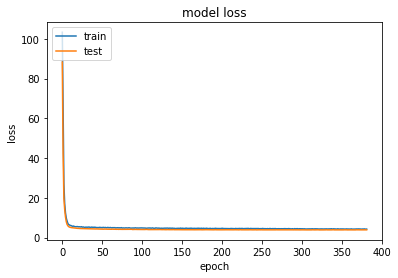

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
loss = model.evaluate(test_X, test_y, verbose=2)
np.sqrt(loss)

1.976194893651008

In [32]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(test_X)
mae = mean_absolute_error(test_y, preds)
rmse = np.sqrt(mae)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

AttributeError: module 'numpy' has no attribute 'root'